<a href="https://colab.research.google.com/github/Stiopy/python-code/blob/main/Mini_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [2]:
# Load the dataset
data = pd.read_excel('Telco_customer_churn.xlsx')

In [3]:
# Display basic information about the dataset and summary statistics
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


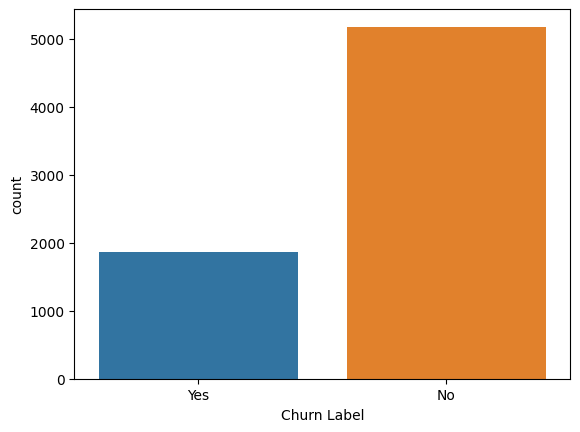

In [4]:
# Visualize the distribution of the target variable
sns.countplot(x='Churn Label', data=data)
plt.show()

In [5]:
# Drop irrelevant columns
data = data.drop(['CustomerID', 'Count', 'Churn Score', 'CLTV', 'Churn Reason', 'Country', 'State', 'Internet Service', 'Churn Label', 'Lat Long'], axis=1)

In [6]:
# One-hot encode categorical columns to convert them into numerical features
data = pd.get_dummies(data, columns=['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
                                     'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
                                     'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'City'],
                      drop_first=True)

In [7]:
# Separate data into features and labels
y = data['Churn Value']  # Labels
X = data.drop('Churn Value', axis=1)  # Features

In [8]:
# Identify columns containing empty strings
columns_with_empty_strings = X.columns[X.applymap(lambda x: isinstance(x, str) and x.isspace()).any()]

In [9]:
# Display rows containing empty strings in these columns
rows_with_empty_strings = X[X[columns_with_empty_strings].apply(lambda x: x.str.isspace()).any(axis=1)]
#print(rows_with_empty_strings)

In [10]:
# Replace empty strings with the mean of values in each column
X[columns_with_empty_strings] = X[columns_with_empty_strings].apply(lambda x: pd.to_numeric(x, errors='coerce'))
X = X.fillna(X.mean())

In [11]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Define the hyperparameters to test
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [13]:
# Define the hyperparameters to test
'''
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced'],
    'max_samples': [None, 0.5, 0.7, 0.9],
    'warm_start': [True, False],
    'oob_score': [True, False]
}
'''

"\nparam_grid = {\n    'n_estimators': [50, 100, 200],\n    'max_depth': [None, 10, 20],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'bootstrap': [True, False],\n    'criterion': ['gini', 'entropy'],\n    'max_features': ['sqrt', 'log2', None],\n    'class_weight': [None, 'balanced'],\n    'max_samples': [None, 0.5, 0.7, 0.9],\n    'warm_start': [True, False],\n    'oob_score': [True, False]\n}\n"

In [14]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier()

In [15]:
# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [16]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [17]:
# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [18]:
# Predictions on the test set
y_pred = best_rf_model.predict(X_test)

In [19]:
# Save the best RF model
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [20]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8232789212207239


In [21]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1076
           1       0.68      0.49      0.57       333

    accuracy                           0.82      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.81      0.82      0.81      1409

